<a href="https://colab.research.google.com/github/Ifdha/Capstone-Project-GrowWell/blob/machine-learning/%5BLatest%5DNeural_Network_Model_Capstone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -q --upgrade ipython
!pip install -q --upgrade ipykernel

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 817.3/817.3 kB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 29.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.4/85.4 kB 6.7 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires ipython==7.34.0, but you have ipython 8.25.0 which is incompatible.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.1/117.1 kB 1.9 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires ipykernel==5.5.6, but you have ipykernel 6.29.4 which is incompatible.
google-colab 1.0.0 requires ipython==7.34.0, but you have ipython 8.25.0 which is incompatible.


In [2]:
!pip install tensorflow==2.0.0.alpha0

ERROR: Could not find a version that satisfies the requirement tensorflow==2.0.0.alpha0 (from versions: 2.8.0rc0, 2.8.0rc1, 2.8.0, 2.8.1, 2.8.2, 2.8.3, 2.8.4, 2.9.0rc0, 2.9.0rc1, 2.9.0rc2, 2.9.0, 2.9.1, 2.9.2, 2.9.3, 2.10.0rc0, 2.10.0rc1, 2.10.0rc2, 2.10.0rc3, 2.10.0, 2.10.1, 2.11.0rc0, 2.11.0rc1, 2.11.0rc2, 2.11.0, 2.11.1, 2.12.0rc0, 2.12.0rc1, 2.12.0, 2.12.1, 2.13.0rc0, 2.13.0rc1, 2.13.0rc2, 2.13.0, 2.13.1, 2.14.0rc0, 2.14.0rc1, 2.14.0, 2.14.1, 2.15.0rc0, 2.15.0rc1, 2.15.0, 2.15.0.post1, 2.15.1, 2.16.0rc0, 2.16.1)
ERROR: No matching distribution found for tensorflow==2.0.0.alpha0


In [3]:
!git clone https://github.com/python-pillow/Pillow/
%cd /content/Pillow/depends
!bash install_raqm.sh

Cloning into 'Pillow'...
remote: Enumerating objects: 85658, done.
remote: Counting objects: 100% (500/500), done.
remote: Compressing objects: 100% (257/257), done.
remote: Total 85658 (delta 294), reused 369 (delta 242), pack-reused 85158
Receiving objects: 100% (85658/85658), 197.21 MiB | 21.90 MiB/s, done.
Resolving deltas: 100% (63812/63812), done.
/content/Pillow/depends
2024-06-15 18:23:50 URL:https://raw.githubusercontent.com/python-pillow/pillow-depends/main/libraqm-0.10.1.tar.gz [300244/300244] -> "libraqm-0.10.1.tar.gz" [1]
rmdir: failed to remove 'libraqm-0.10.1': No such file or directory
libraqm-0.10.1/
libraqm-0.10.1/.ci/
libraqm-0.10.1/.ci/deploy-docs.sh
libraqm-0.10.1/.github/
libraqm-0.10.1/.github/workflows/
libraqm-0.10.1/.github/workflows/ci.yml
libraqm-0.10.1/AUTHORS
libraqm-0.10.1/CODING.md
libraqm-0.10.1/COPYING
libraqm-0.10.1/NEWS
libraqm-0.10.1/README.md
libraqm-0.10.1/docs/
libraqm-0.10.1/docs/meson.build
libraqm-0.10.1/docs/raqm-docs.xml
libraqm-0.10.1/docs/

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import Sequence

# Mount Google Drive
drive.mount('/content/drive')

# Load the dataset
dataset_df = pd.read_csv("/content/drive/MyDrive/data_balita.csv")

Mounted at /content/drive


In [5]:
# Check for missing values
dataset_df.isnull().sum()

Umur (bulan)         0
Jenis Kelamin        0
Tinggi Badan (cm)    0
Status Gizi          0
dtype: int64

In [6]:
# Check for duplicates
dataset_df.duplicated().sum()

81574

In [7]:
# Drop missing values
dataset_df.dropna(axis=0, inplace=True)

In [8]:
# Melakukan encoding pada kolom Jenis Kelamin dan Status Gizi
label_encoder = LabelEncoder()
dataset_df['Jenis Kelamin'] = label_encoder.fit_transform(dataset_df['Jenis Kelamin'])
dataset_df['Status Gizi'] = label_encoder.fit_transform(dataset_df['Status Gizi'])

# Split features and target
X = dataset_df.drop('Status Gizi', axis=1).values
y = dataset_df['Status Gizi'].values

# Membagi data menjadi data pelatihan dan data pengujian (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

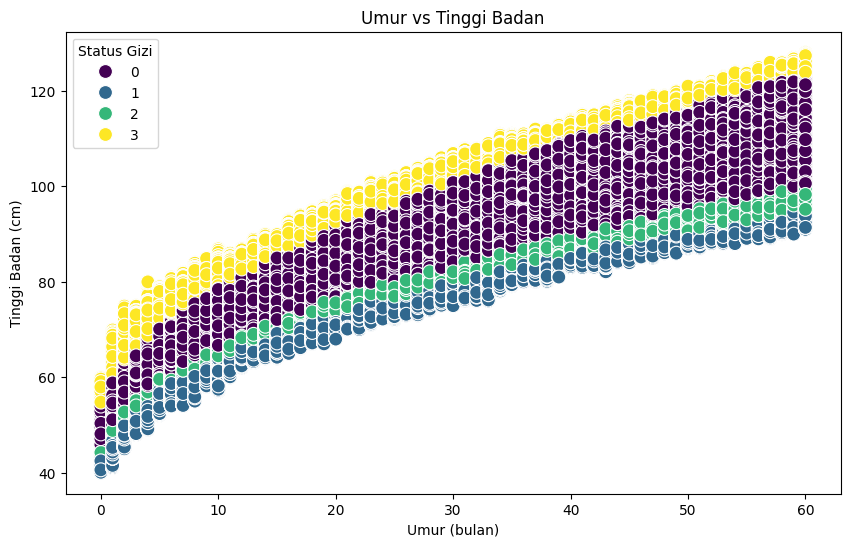

In [9]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=dataset_df, x='Umur (bulan)', y='Tinggi Badan (cm)', hue='Status Gizi', palette='viridis', s=100)
plt.title('Umur vs Tinggi Badan')
plt.show()

In [10]:
import numpy as np
from tensorflow.keras.utils import Sequence

class DataGenerator(Sequence):
    def __init__(self, data, labels, batch_size=32, shuffle=True):
        self.data = data
        self.labels = labels
        self.batch_size = batch_size
        self.shuffle = shuffle
        self.on_epoch_end()

    def __len__(self):
        return int(np.floor(len(self.data) / self.batch_size))

    def __getitem__(self, index):
        # Generate indexes of the batch
        batch_indexes = self.indexes[index * self.batch_size:(index + 1) * self.batch_size]

        # Generate data for the batch
        batch_data = self.data[batch_indexes]
        batch_labels = self.labels[batch_indexes]

        return batch_data, batch_labels

    def on_epoch_end(self):
        self.indexes = np.arange(len(self.data))
        if self.shuffle:
            np.random.shuffle(self.indexes)


In [11]:
# Create Data Generators
batch_size = 32
train_generator = DataGenerator(X_train, y_train, batch_size=batch_size)
test_generator = DataGenerator(X_test, y_test, batch_size=batch_size)

In [12]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

# Define the model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(4, activation='softmax')  # output layer dengan 4 neuron, sesuai dengan jumlah kelas
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_model.h5', monitor='val_loss', save_best_only=True, verbose=1)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=1e-6)


In [13]:
# Train the model using the data generators
history = model.fit(train_generator, validation_data=test_generator, epochs=30)

Epoch 1/30
3024/3024 [==============================] - 17s 5ms/step - loss: 1.1686 - accuracy: 0.5556 - val_loss: 1.0233 - val_accuracy: 0.5618
Epoch 2/30
3024/3024 [==============================] - 14s 5ms/step - loss: 0.8604 - accuracy: 0.6438 - val_loss: 0.5039 - val_accuracy: 0.7896
Epoch 3/30
3024/3024 [==============================] - 13s 4ms/step - loss: 0.4811 - accuracy: 0.7934 - val_loss: 0.2856 - val_accuracy: 0.9066
Epoch 4/30
3024/3024 [==============================] - 13s 4ms/step - loss: 0.3718 - accuracy: 0.8408 - val_loss: 0.2785 - val_accuracy: 0.8742
Epoch 5/30
3024/3024 [==============================] - 13s 4ms/step - loss: 0.3307 - accuracy: 0.8576 - val_loss: 0.2440 - val_accuracy: 0.9020
Epoch 6/30
3024/3024 [==============================] - 12s 4ms/step - loss: 0.3008 - accuracy: 0.8718 - val_loss: 0.2365 - val_accuracy: 0.8921
Epoch 7/30
3024/3024 [==============================] - 13s 4ms/step - loss: 0.2818 - accuracy: 0.8784 - val_loss: 0.3828 - val_ac

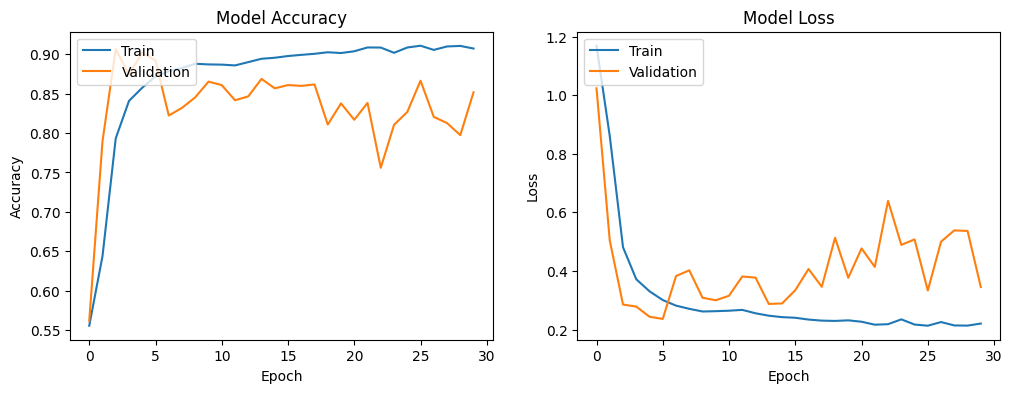

In [19]:
# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

In [20]:
import tensorflow as tf
print('\u2022 Using TensorFlow Version:', tf.__version__)

• Using TensorFlow Version: 2.15.0


In [21]:
export_dir = 'saved_model/1'
tf.saved_model.save(model, export_dir)

In [22]:
# Convert the model.
converter = tf.lite.TFLiteConverter.from_saved_model(export_dir)
tflite_model = converter.convert()

In [23]:
import pathlib
tflite_model_file = pathlib.Path('model_last.tflite')
tflite_model_file.write_bytes(tflite_model)

20796

In [24]:
try:
    from google.colab import files
    files.download(tflite_model_file)
except:
    pass

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>